In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('archive/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Columns:

- **longitude**: A measure of how far west a house is; a higher value is farther west.

- **latitude**: A measure of how far north a house is; a higher value is farther north.

- **housingMedianAge**: Median age of a house within a block; a lower number indicates a newer building.

- **totalRooms**: Total number of rooms within a block.

- **totalBedrooms**: Total number of bedrooms within a block.

- **population**: Total number of people residing within a block.

- **households**: Total number of households, which is a group of people residing within a home unit, for a block.

- **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars).

- **medianHouseValue**: Median house value for households within a block (measured in US Dollars).

- **oceanProximity**: Location of the house with respect to the ocean/sea.

# Exploratorial Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Since the only column with null values is total_bedrooms, and this number of null columns is less than 5% of the entire dataset. The instances where total_bedrooms is null will be dropped and the analysis will continue.

In [6]:
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- Only 207 null instances in total_bedrooms


In [7]:
drpd_df = df.dropna()
drpd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
train_df=drpd_df

In [9]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


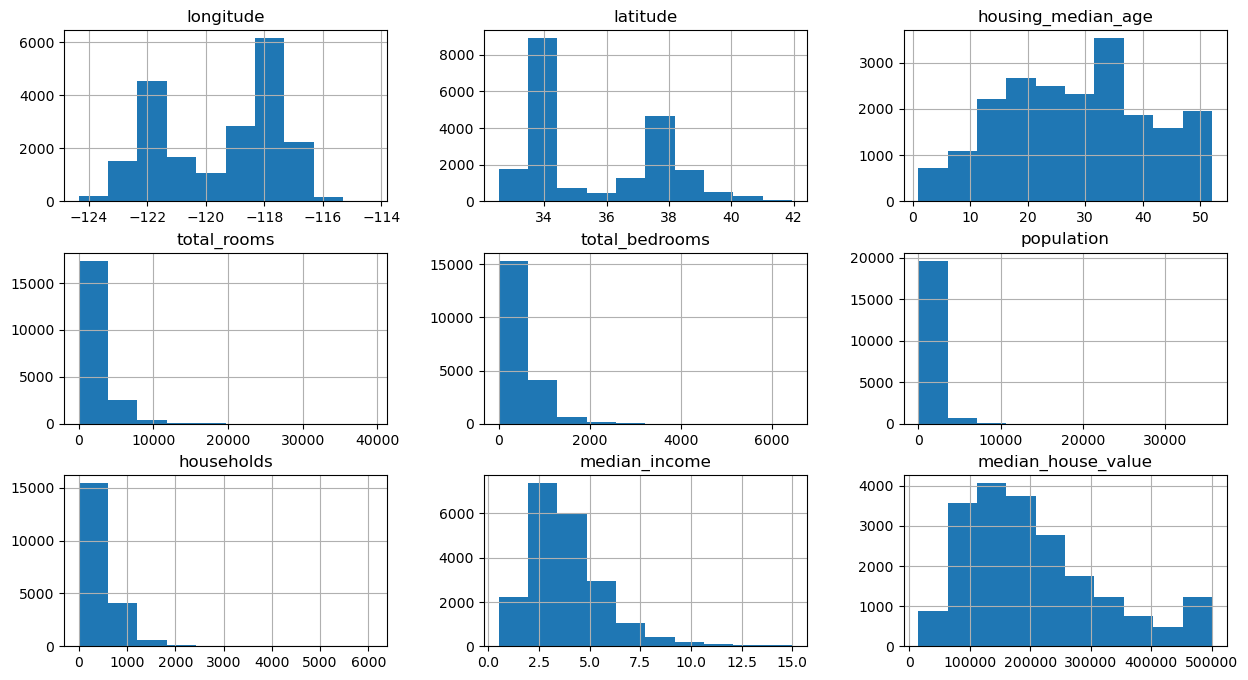

In [10]:
train_df.hist(figsize=(15, 8))
plt.show()

- Notice that total_rooms, total_bedrooms, population and households are all right skewed, therefore a log normalization can be applied so the variables have a distribuition closer to normal.

In [11]:
numeric_cols = train_df.select_dtypes(include='number').columns
categorical_cols = train_df.select_dtypes(include='object').columns
print('Numeric:')
print(numeric_cols)
print('We have '+str(len(numeric_cols))+ ' numeric features.')
print('Categorical:')
print(categorical_cols)
print('We have '+str(len(categorical_cols))+ ' categorical feature.')

Numeric:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
We have 9 numeric features.
Categorical:
Index(['ocean_proximity'], dtype='object')
We have 1 categorical feature.


<Axes: >

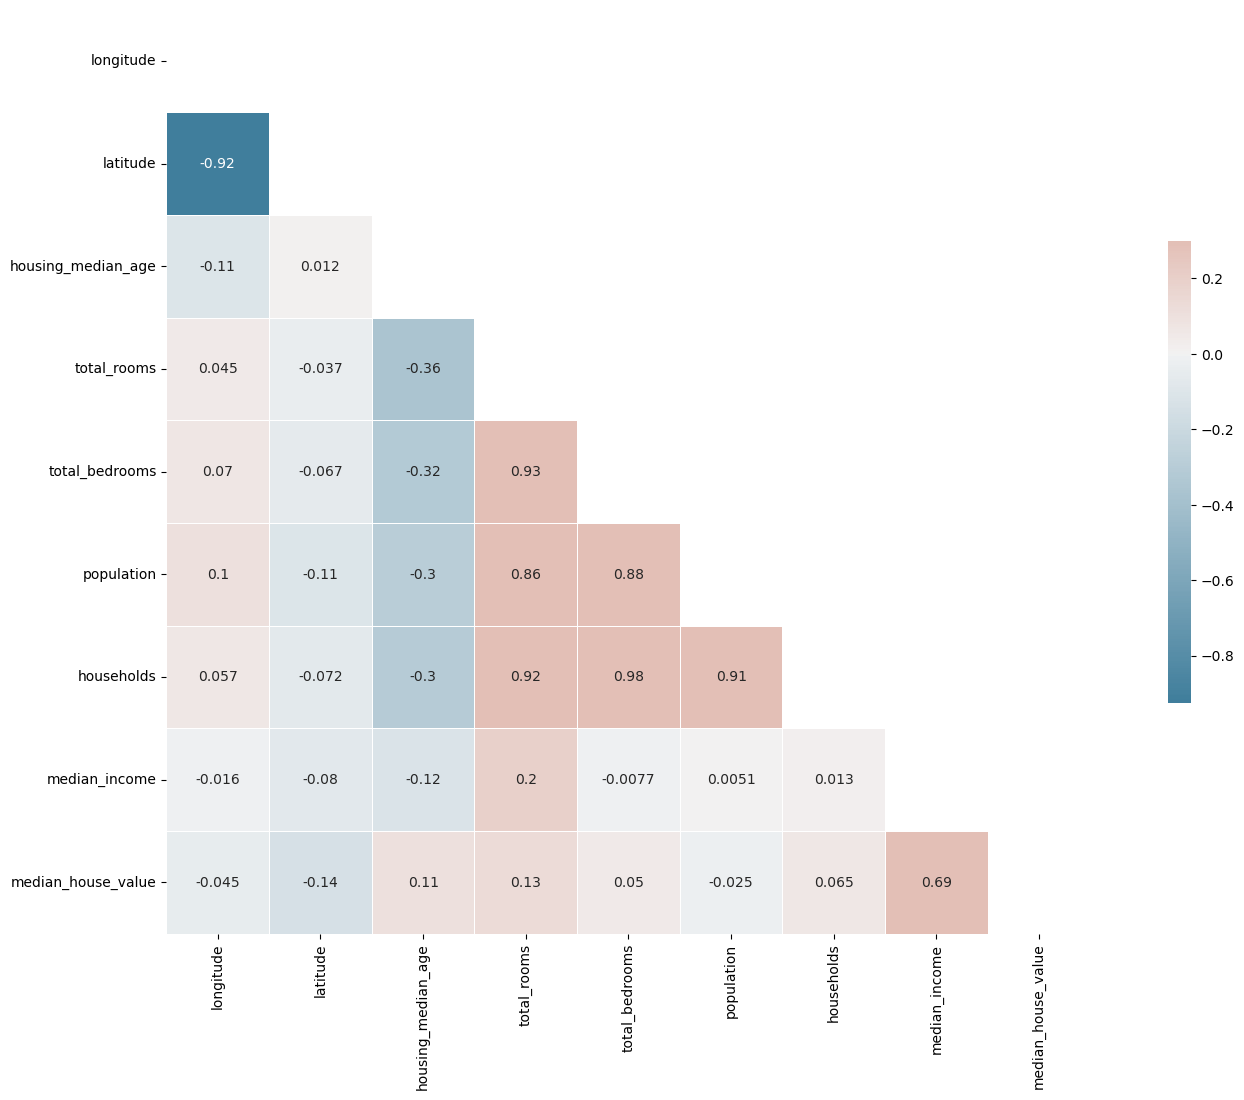

In [12]:
corr = train_df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Conclusions:
- The majority of the data is not distributed like a Gaussian Curve(Normal Distribution).
- median_income has a relatively high correlation with the tanget variable --> median_house_value.

In [13]:
train_df['total_rooms'] = np.log(train_df['total_rooms']+1)
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']+1)
train_df['population'] = np.log(train_df['population']+1)
train_df['households'] = np.log(train_df['households']+1)

/tmp/ipykernel_8604/1207000594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['total_rooms'] = np.log(train_df['total_rooms']+1)
/tmp/ipykernel_8604/1207000594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['total_bedrooms'] = np.log(train_df['total_bedrooms']+1)
/tmp/ipykernel_8604/1207000594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

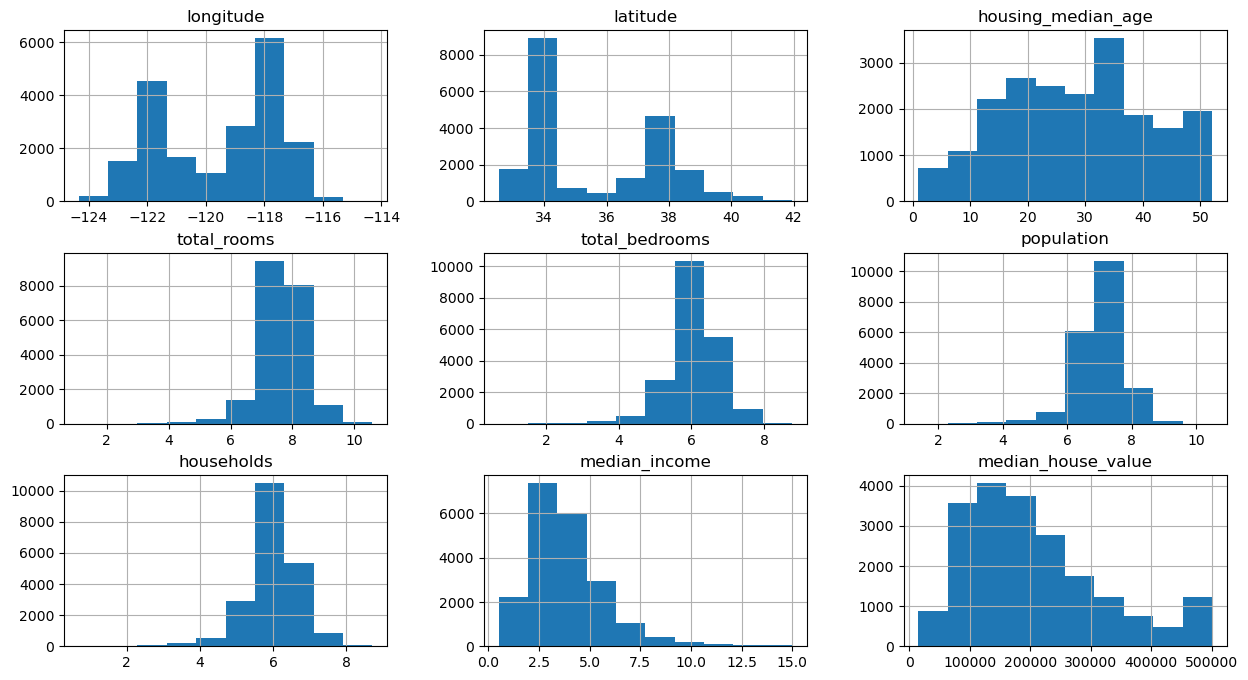

In [14]:
train_df.hist(figsize=(15, 8))
plt.show()

- After the scaling data is distributed more normally across all variables.

In [15]:
train_df[categorical_cols].value_counts()

ocean_proximity
<1H OCEAN          9034
INLAND             6496
NEAR OCEAN         2628
NEAR BAY           2270
ISLAND                5
dtype: int64

### Conclusions:
- There are 5 different categories for ocean_proximity, therefore an one-hot encoding technique sounds like a great idea.

In [16]:
train_df=train_df.join(pd.get_dummies(train_df[categorical_cols]))

In [17]:
train_df=train_df.drop(['ocean_proximity'], axis=1)

<Axes: >

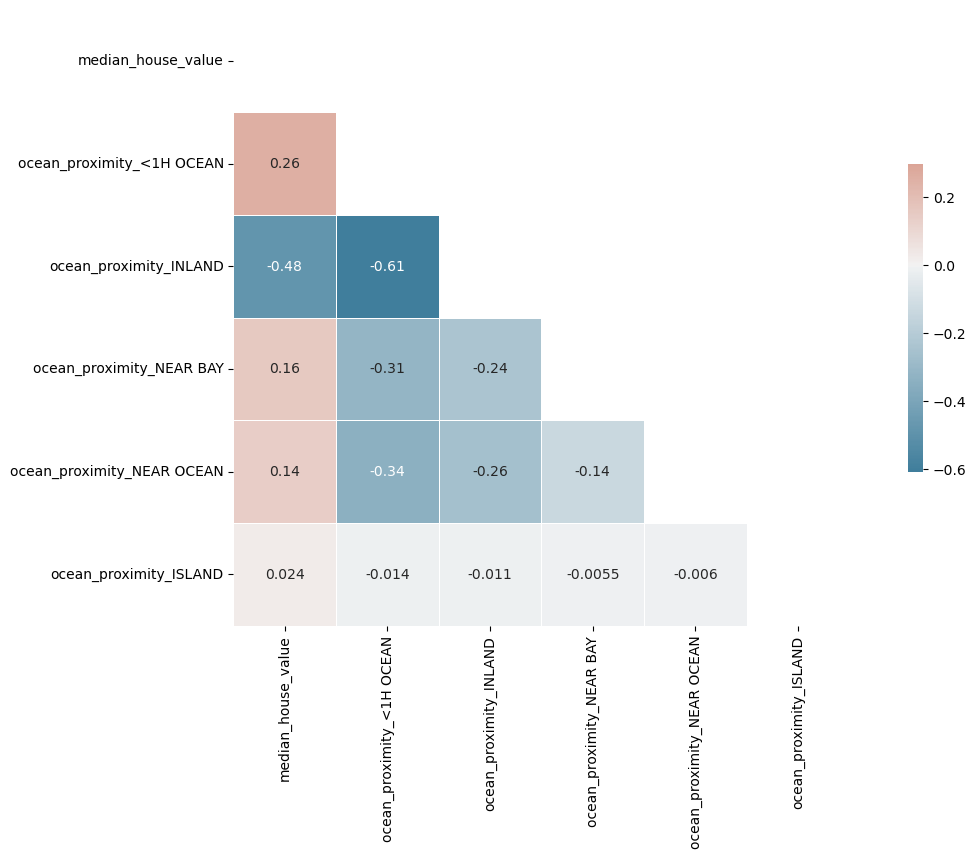

In [18]:
cat_an = ['median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_ISLAND']
corr = train_df[cat_an].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Conclusions:
- INLAND houses usually have lower prices.
- <1H OCEAN houses usually have higher prices.

### Visualization

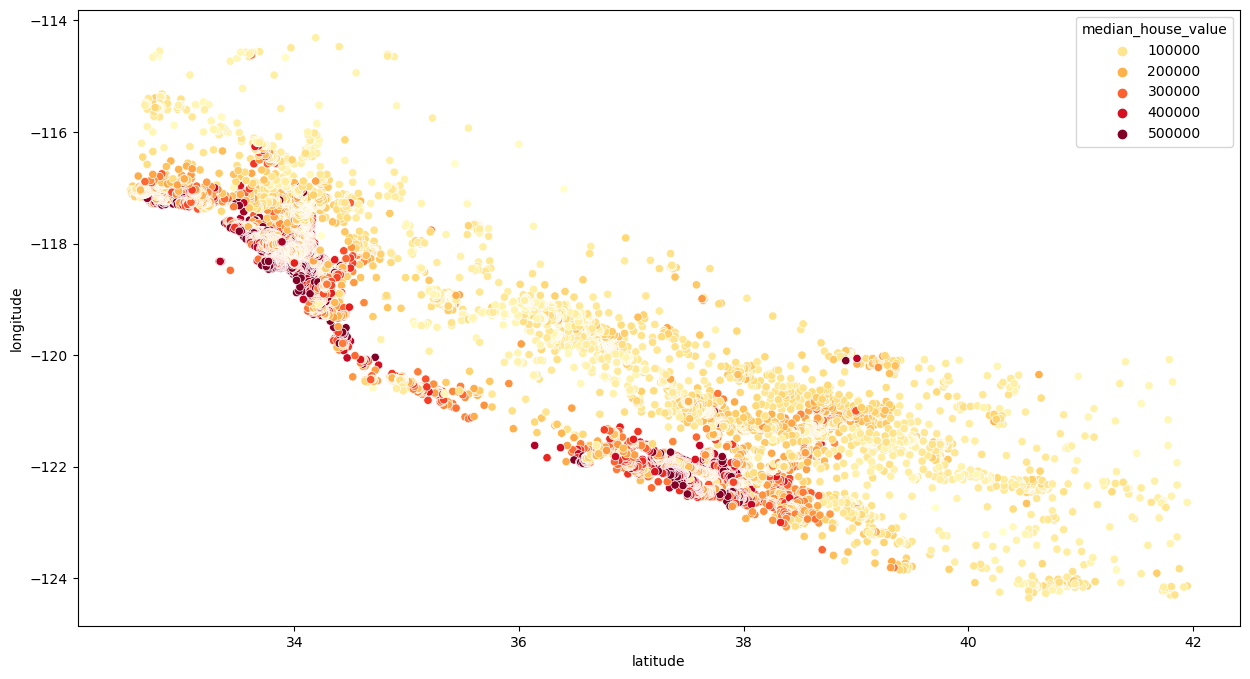

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='median_house_value', palette="YlOrRd")
plt.show()

**Visualization:** We can pretty much see the map of california and visualize that houses located closer to the ocean have a more red-ish color meaning they are more expensive, and inland houses have a more yellow-ish color meaning they are cheaper.

### Feature Engineering

In [20]:
train_df['bedroom_ratio'] = train_df['total_bedrooms']/train_df['total_rooms']
train_df['household_rooms'] = train_df['total_rooms']/train_df['households']
train_df['people_per_room'] = train_df['population']/train_df['total_rooms']
train_df['people_per_household'] = train_df['population']/train_df['households']

<Axes: >

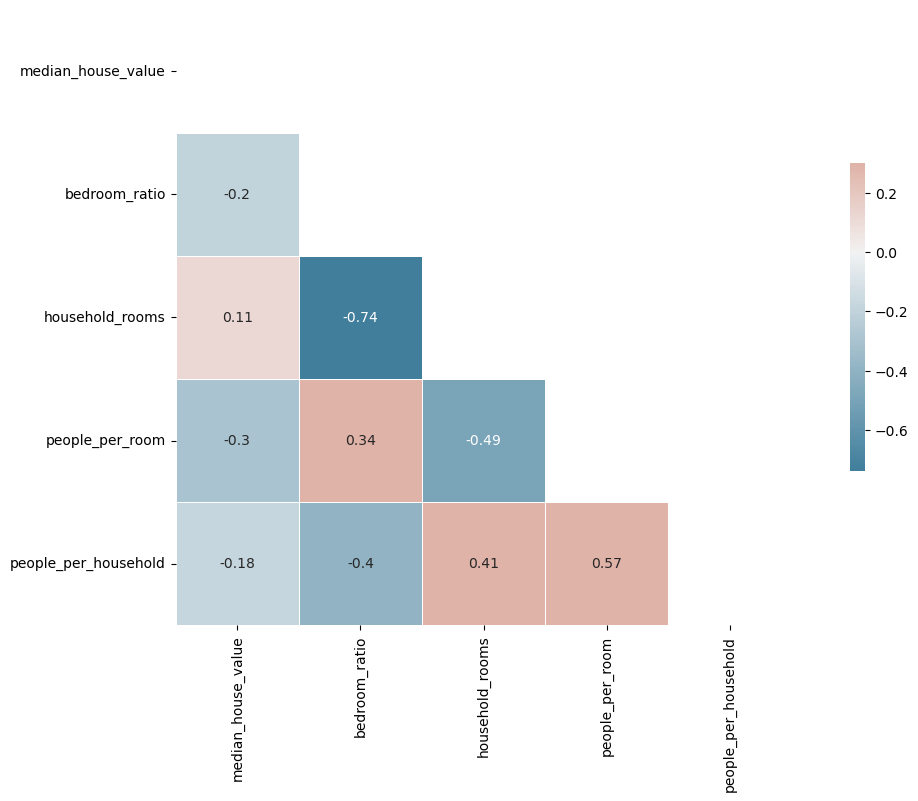

In [21]:
cat_an = ['median_house_value', 'bedroom_ratio', 'household_rooms', 'people_per_room', 'people_per_household']
corr = train_df[cat_an].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### Conclusion:
- The new engineered features have good(positive or negative) correlation with the target variable.
- The engineered features using the population column produced much better correlation than the population column itself.
- population column will be dropped and engineered features kept.

In [22]:
train_df=train_df.drop(['population'], axis=1)

In [23]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms,people_per_room,people_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834,0.852028,1.192698
1,-122.22,37.86,21.0,8.867850,7.009409,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013,0.877784,1.106019
2,-122.24,37.85,52.0,7.291656,5.252273,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171,0.851465,1.198157
3,-122.25,37.85,52.0,7.150701,5.463832,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768,0.884689,1.172893
4,-122.25,37.85,52.0,7.395108,5.638355,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892,0.857133,1.139895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530,0.908649,1.161734
20636,-121.21,39.49,18.0,6.548219,5.017280,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045,0.897608,1.238740
20637,-121.22,39.43,17.0,7.720905,6.186209,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340,0.895714,1.138757
20638,-121.32,39.43,18.0,7.528869,6.016157,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243,0.877867,1.128273


### Modeling Linear Regression

In [31]:
X=train_df.drop(['median_house_value'], axis=1)
y=train_df['median_house_value']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
lr_score = linreg.score(X_test, y_test)
lr_score

0.6617461795906161

In [35]:
from sklearn.metrics import mean_squared_error
y_pred=linreg.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_rmse

68012.36759347504

### Modeling Lasso Regression

In [36]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train, y_train)

/home/vitor-figueira/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+13, tolerance: 2.164e+10
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [37]:
las_score=lasso.score(X_test, y_test)
las_score

0.6618631581714592

In [38]:
y_pred=lasso.predict(X_test)
las_rmse=mean_squared_error(y_test, y_pred, squared=False)
las_rmse

68000.60619162778

### Modeling Gradient Boost Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
gbr_score=gbr.score(X_test, y_test)
gbr_score

0.7888356552792415

In [41]:
y_pred=gbr.predict(X_test)
gbr_rmse=mean_squared_error(y_test, y_pred, squared=False)
gbr_rmse

53737.42261798457

### Modeling Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
rfr_score=rfr.score(X_test, y_test)
rfr_score

0.8153836806587824

In [44]:
y_pred=rfr.predict(X_test)
rfr_rmse=mean_squared_error(y_test, y_pred, squared=False)
rfr_rmse

50246.01022017617

### Conclusion:
- Random Forest Regressor has the best R2 score and Root Mean Squared Error, therefore this model is chosen for a hyperparameter tunning as it looks like the most promising.

## Hyperparameter Tunning

In [125]:
from sklearn.model_selection import GridSearchCV
tunrfr=RandomForestRegressor()
params={
    'n_estimators':[200, 225, 250],
    'min_samples_split':[2,4]
}
grid_search=GridSearchCV(tunrfr, params, cv=4, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4],
                         'n_estimators': [200, 225, 250]},
             scoring='r2')

In [126]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=225)

In [118]:
from sklearn.model_selection import GridSearchCV
tunrfr=RandomForestRegressor()
params={
    'n_estimators':[225, 237, 250],
}
grid_search=GridSearchCV(tunrfr, params, cv=4, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [225, 237, 250]}, scoring='r2')

In [119]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=225)

- After two cross-validation search grids, the hyperparameters used are decided.

In [45]:
tunrfr=RandomForestRegressor(n_estimators=225)
tunrfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=225)

In [46]:
tunrfr_score=tunrfr.score(X_test, y_test)
tunrfr_score

0.8187043734404589

In [47]:
y_pred=rfr.predict(X_test)
tunrfr_rmse=mean_squared_error(y_test, y_pred, squared=False)
tunrfr_rmse 

50246.01022017617

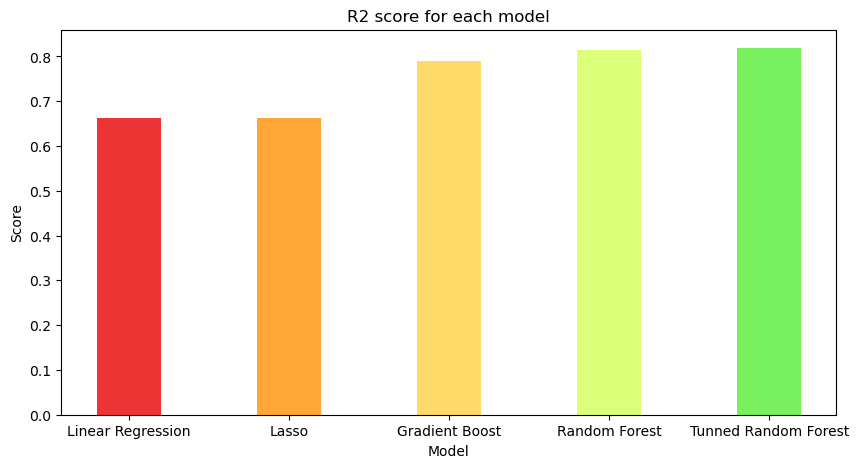

In [57]:

dec = ['Linear Regression', 'Lasso', 'Gradient Boost', 'Random Forest', 'Tunned Random Forest']
values = [lr_score, las_score, gbr_score, rfr_score, tunrfr_score]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dec, values, color =['#ec3434', '#ffa637', '#ffda68', '#dcff79', '#79f05e'], 
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("R2 score for each model")
plt.show()

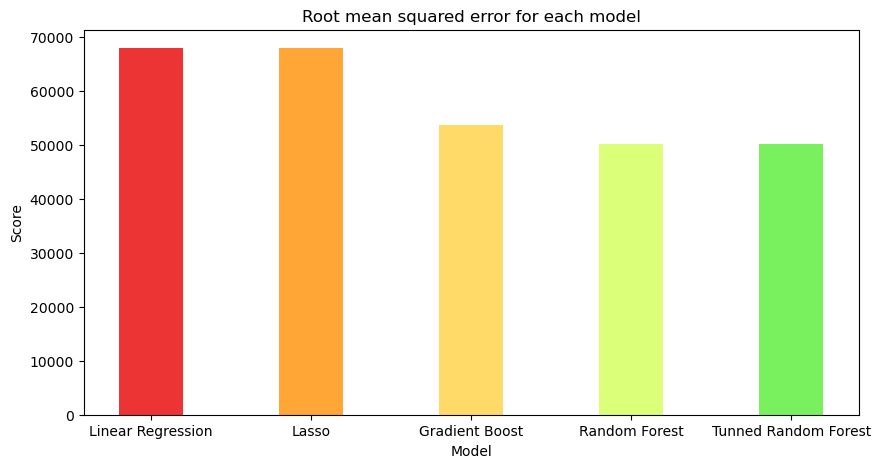

In [58]:
dec = ['Linear Regression', 'Lasso', 'Gradient Boost', 'Random Forest', 'Tunned Random Forest']
values = [lr_rmse, las_rmse, gbr_rmse, rfr_rmse, tunrfr_rmse]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dec, values, color =['#ec3434', '#ffa637', '#ffda68', '#dcff79', '#79f05e'], 
        width = 0.4)
 
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Root mean squared error for each model")
plt.show()

# Final Conclusion:
- The best model for predicting house prices in this dataset found by me was the final tunned Random Forest Regressor, with 81.8% R2 Score and 50060.513 RMSE. The barplots show a comparison between models and evaluation metrics I have used.